In [1]:
#Import Module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Data diberikan dalam bentuk Dataframe agar tidak perlu menggunakan file CSV

data = {'Kabupaten/Kodya': ['CILACAP', 'BANYUMAS', 'PURBALINGGA',
                            'BANJARNEGARA', 'KEBUMEN', 'PURWOREJO', 'WONOSOBO',
                            'MAGELANG', 'BOYOLALI', 'KLATEN', 'SUKOHARJO',
                            'WONOGIRI', 'KARANGANYAR', 'SRAGEN', 'GROBOGAN',
                            'BLORA', 'REMBANG', 'PATI', 'KUDUS', 'JEPARA',
                            'DEMAK', 'SEMARANG', 'TEMANGGUNG', 'KENDAL',
                            'BATANG', 'PEKALONGAN', 'PEMALANG', 'TEGAL',
                            'BREBES', 'KOTA MAGELANG', 'KOTA SURAKARTA',
                            'KOTA SALATIGA', 'KOTA SEMARANG',
                            'KOTA PEKALONGAN', 'KOTA TEGAL'],
        'Jan': [62, 32, 56, 53, 49, 47, 7, 40, 95, 40, 13, 20, 22, 56, 120,
                282, 222, 89, 55, 139, 76, 34, 45, 79, 65, 31, 70, 27, 57, 2,
                22, 3, 21, 5, 6],
        'Feb': [76, 157, 36, 85, 44, 29, 5, 55, 121, 65, 21, 8, 35, 100, 132,
                204, 150, 116, 157, 133, 56, 152, 48, 77, 105, 31, 81, 60, 66,
                6, 36, 16, 37, 14, 3],
        'Mar': [70, 29, 52, 37, 50, 32, 10, 51, 28, 107, 43, 2, 44, 110, 152,
                25, 18, 121, 108, 110, 20, 52, 45, 81, 53, 64, 64, 61, 108, 11,
                58, 8, 61, 4, 8],
        'April': [101, 134, 4, 47, 39, 29, 9, 52, 74, 126, 52, 11, 75, 110, 10,
                  15, 13, 43, 116, 99, 118, 82, 50, 61, 104, 43, 54, 41, 151,
                  8, 62, 8, 47, 4, 4],
        'Mei': [67, 68, 10, 48, 82, 28, 12, 15, 34, 66, 61, 3, 45, 71, 42, 8,
                26, 25, 96, 65, 73, 86, 33, 29, 101, 18, 77, 16, 125, 18, 74,
                9, 48, 2, 6],
        'Juni': [92, 21, 32, 13, 50, 22, 12, 4, 11, 26, 31, 1, 39, 46, 31, 9,
                 13, 16, 49, 33, 43, 84, 43, 12, 47, 46, 33, 10, 73, 4, 42, 6,
                 43, 2, 5],
        'Juli': [78, 9, 25, 21, 11, 12, 2, 13, 26, 51, 26, 2, 66, 20, 47, 6,
                 45, 41, 18, 39, 73, 19, 46, 29, 14, 12, 7, 17, 42, 9, 42, 9,
                 20, 1, 3],
        'Agt': [48, 8, 4, 4, 0, 0, 4, 2, 7, 28, 16, 1, 43, 16, 41, 12, 25, 23,
                16, 16, 44, 12, 90, 17, 10, 7, 9, 8, 32, 5, 13, 5, 27, 0, 0],
        'Sep': [12, 4, 8, 2, 3, 3, 3, 1, 7, 2, 7, 1, 31, 9, 44, 9, 26, 11, 8,
                16, 25, 0, 14, 14, 6, 8, 6, 5, 12, 2, 13, 4, 25, 2, 5],
        'Okt': [16, 16, 0, 3, 16, 3, 0, 16, 14, 16, 11, 2, 25, 20, 49, 17, 16,
                59, 29, 17, 38, 12, 16, 7, 9, 18, 29, 23, 20, 5, 7, 0, 32, 1,
                5],
        'Nop': [16, 11, 11, 4, 9, 0, 0, 13, 15, 15, 5, 0, 12, 19, 46, 10, 28,
                19, 8, 14, 39, 17, 14, 8, 19, 12, 26, 6, 17, 2, 2, 0, 36, 1,
                4],
        'Des': [16, 15, 13, 13, 13, 12, 0, 7, 4, 10, 3, 1, 10, 16, 38, 13, 17,
                31, 10, 28, 35, 11, 14, 1, 14, 9, 19, 10, 16, 1, 0, 0, 25, 0,
                1],
        'Total': [654, 504, 251, 330, 366, 217, 64, 269, 436, 552, 289, 52,
                  447, 593, 752, 610, 599, 594, 670, 709, 640, 561, 458, 415,
                  547, 299, 475, 284, 719, 73, 371, 68, 422, 36, 50],
        'IR': [38.39, 30.53, 27.66, 36.37, 30.79, 30.45, 8.2, 21.4, 44.98,
               47.45, 33.17, 5.46, 51.73, 67.23, 55.36, 71.3, 95.98, 47.9,
               79.62, 58.8, 56.67, 55.31, 60.86, 43.7, 72.96, 33.97, 36.75,
               19.87, 40.19, 60.27, 72.15, 36.48, 24.41, 12.03, 20.23],
        'CFR': [1.4, 2.2, 0.8, 0.9, 0.3, 0.5, 0, 0.4, 1.8, 2.7, 3.5, 3.8, 1.1,
                0.8, 1.6, 0.8, 2.2, 1.3, 2.8, 0.3, 1.9, 1.1, 0.4, 1.7, 1.5,
                0.3, 0.8, 4.6, 0.6, 2.7, 3, 1.5, 2.1, 0, 2],
        'Jumlah penduduk': ['1,703,390', '1,650,625', '907,507', '907,410',
                            '1,188,603', '712,686', '780,793', '1,257,123',
                            '969,325', '1,163,218', '871,397', '951,975',
                            '864,021', '882,090', '1,358,404', '855,573',
                            '624,096', '1,239,989', '841,499', '1,205,800',
                            '1,129,298', '1,014,198', '752,486', '949,682',
                            '749,720', '880,092', '1,292,609', '1,429,386',
                            '1,788,880', '121,112', '514,171', '186,420',
                            '1,729,083', '299,222', '247,212']}

dbd = pd.DataFrame(data)
dbd.head()

,Kabupaten/Kodya,Jan,Feb,Mar,April,Mei,Juni,Juli,Agt,Sep,Okt,Nop,Des,Total,IR,CFR,Jumlah penduduk
0,CILACAP,62,76,70,101,67,92,78,48,12,16,16,16,654,38.39,1.4,"1,703,390"
1,BANYUMAS,32,157,29,134,68,21,9,8,4,16,11,15,504,30.53,2.2,"1,650,625"
2,PURBALINGGA,56,36,52,4,10,32,25,4,8,0,11,13,251,27.66,0.8,"907,507"
3,BANJARNEGARA,53,85,37,47,48,13,21,4,2,3,4,13,330,36.37,0.9,"907,410"
4,KEBUMEN,49,44,50,39,82,50,11,0,3,16,9,13,366,30.79,0.3,"1,188,603"


In [8]:
#Preprocess agar hanya menggunakan data pada kolom 1-13 (data bulan)

dbd_x = dbd.iloc[:, 1:13].values
dbd_x

array([[ 62,  76,  70, 101,  67,  92,  78,  48,  12,  16,  16,  16],
       [ 32, 157,  29, 134,  68,  21,   9,   8,   4,  16,  11,  15],
       [ 56,  36,  52,   4,  10,  32,  25,   4,   8,   0,  11,  13],
       [ 53,  85,  37,  47,  48,  13,  21,   4,   2,   3,   4,  13],
       [ 49,  44,  50,  39,  82,  50,  11,   0,   3,  16,   9,  13],
       [ 47,  29,  32,  29,  28,  22,  12,   0,   3,   3,   0,  12],
       [  7,   5,  10,   9,  12,  12,   2,   4,   3,   0,   0,   0],
       [ 40,  55,  51,  52,  15,   4,  13,   2,   1,  16,  13,   7],
       [ 95, 121,  28,  74,  34,  11,  26,   7,   7,  14,  15,   4],
       [ 40,  65, 107, 126,  66,  26,  51,  28,   2,  16,  15,  10],
       [ 13,  21,  43,  52,  61,  31,  26,  16,   7,  11,   5,   3],
       [ 20,   8,   2,  11,   3,   1,   2,   1,   1,   2,   0,   1],
       [ 22,  35,  44,  75,  45,  39,  66,  43,  31,  25,  12,  10],
       [ 56, 100, 110, 110,  71,  46,  20,  16,   9,  20,  19,  16],
       [120, 132, 152,  10,  42,  

In [9]:
#Mengubah data kebentuk scatter 3d dengan x = kota, y = bulan, z = jumlah kasus

dbd_3d = dbd_x.tolist()

a = []
for i in range(len(dbd_3d)):
    for j in range(12):
        b = [i, j, dbd_3d[i][j]]
        a.append(b)

a = np.array(a)
a

array([[ 0,  0, 62],
       [ 0,  1, 76],
       [ 0,  2, 70],
       ...,
       [34,  9,  5],
       [34, 10,  4],
       [34, 11,  1]])

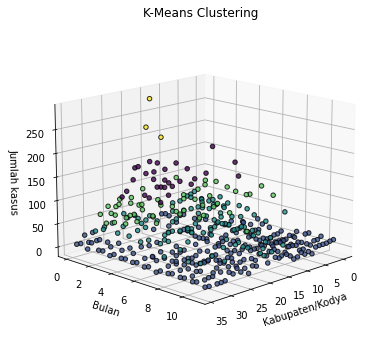

In [10]:
#Membentuk 5 cluster pada scatter 3d

kmeans = KMeans(n_clusters=5).fit(a)

#Plotting 3d

labels = kmeans.labels_

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(a[:, 0], a[:, 1], a[:, 2], c=labels,
           edgecolor='k', alpha=0.8)

ax.view_init(15, 45)
ax.set_xlabel("Kabupaten/Kodya")
ax.set_ylabel("Bulan")
ax.set_zlabel("Jumlah kasus")
ax.set_title('K-Means Clustering')
plt.show()

In [11]:
#Mengubah data menggunakan pca menjadi 2D-Array

pca = PCA(2)
dbd_pca = pca.fit_transform(dbd_x)
dbd_pca

array([[  37.04586711,  -64.93414446],
       [  50.98311121,  -49.71841688],
       [ -46.6992953 ,   45.39228583],
       [  -6.51103166,   15.65269979],
       [ -23.95352738,  -12.14283314],
       [ -55.9120233 ,   29.21175872],
       [-112.43848676,   37.21031745],
       [ -35.17799692,   16.92357947],
       [  46.35036711,   31.17794321],
       [  20.88469505,  -79.46532336],
       [ -63.97204566,  -25.97242422],
       [-106.64173864,   52.35932391],
       [ -36.47232265,  -38.6142455 ],
       [  50.39697464,  -63.43606271],
       [ 102.84430691,   24.37732351],
       [ 195.00385671,  180.77896669],
       [ 131.4714874 ,  134.42042584],
       [  63.81337261,   12.45618819],
       [  91.03699616,  -74.52036584],
       [ 120.72766237,   -9.20324454],
       [  26.02165761,  -44.02949575],
       [  51.95845445,  -51.92887668],
       [ -21.28955989,   -9.09291667],
       [  17.94909241,   12.30578898],
       [  46.17828587,  -48.18270626],
       [ -49.76662307,   

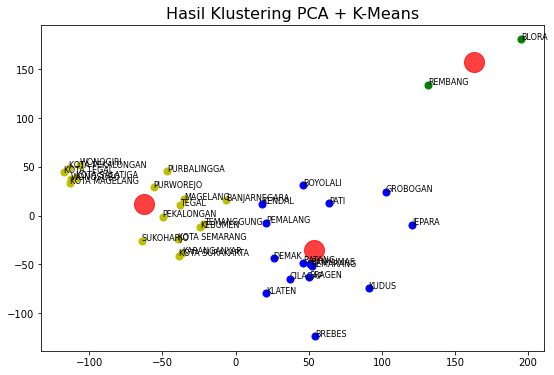

In [12]:
#Membentuk 3 cluster pada scatter plot pca

kmeans = KMeans(3).fit(dbd_pca)

#Memberikan label kota tiap plotnya

kota = dbd.iloc[:, 0].values.tolist()

#Memberikan warna plot yang berbeda tiap clusternya
dbd['kluster'] = kmeans.labels_
colors = ['b', 'y', 'g', 'k', 'm']
colors = [colors[i] for i in list(dbd.kluster)]

#Plotting

fig = plt.figure(figsize=(9, 6))
for i in range(dbd_pca.shape[0]):
    plt.scatter(dbd_pca[i, 0], dbd_pca[i, 1], c=colors[i], s=50, marker='o')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='r', s=400, marker='o', alpha=0.75)

plt.title('Hasil Klustering PCA + K-Means', fontsize=16)
for i, label in enumerate(kota):
    plt.annotate(label, (dbd_pca[i, 0], dbd_pca[i, 1]), fontsize=8)
plt.show()